# Exemplo de reamostragem das partículas

In [2]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

%matplotlib inline



## Criação das partículas e do robô

In [3]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

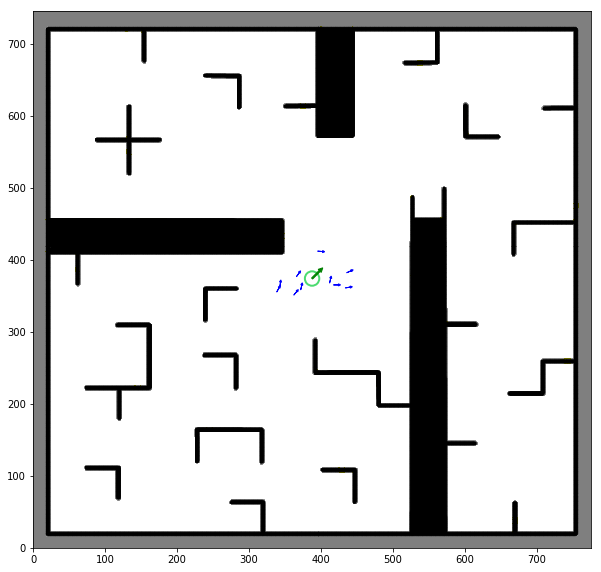

In [4]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [5]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [6]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [7]:
particulas_exp

[[433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [342.7195968598557, 362.13950036332284, 1.4332609981877729],
 [362.05905527560793, 350.9413027974557, 0.8814552474235742],
 [411.81778255380243, 367.7059496551297, 1.3409263016162527],
 [417.08235011460755, 365.1205347515174, 0.003217436498961279],
 [338.394698103459, 355.25344006152784, 1.0640908558041156],
 [395.1114041860231, 412.0434701490011, -0.08864640743364208],
 [365.7834308880589, 376.5623363929046, 0.9536100145658357],
 [435.4978137529632, 381.99529645427634, 0.42148219672123866],
 [371.7318295515942, 358.29522209166896, 1.3457161610007358]]

Vejam como está a distribuição dos pesos

In [8]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [13]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [10]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [11]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [12]:
valores_novas_particulas

[[395.1114041860231, 412.0434701490011, -0.08864640743364208],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [371.7318295515942, 358.29522209166896, 1.3457161610007358],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132],
 [338.394698103459, 355.25344006152784, 1.0640908558041156],
 [433.6544174271052, 360.9530687867645, 0.16394021474520132]]

![](animated.gif)